# Dataset

eLife and PLOS as introduced by Goldsack et al in [Making Science Simple: Corpora for the Lay Summarisation of Scientific Literature](https://aclanthology.org/2022.emnlp-main.724/)

In [18]:
import pandas as pd
from transformers import AutoTokenizer, LEDTokenizer, GPT2Tokenizer
import numpy as np
import matplotlib.pyplot as plt

## Dataset selection
Uncomment either path to analyse the dataset.

In [10]:
path = "../data/input/rouge/eLife_train.jsonl" # eLife
#path = "../data/task1_development/train/PLOS_train.jsonl" # PLOS

## Dataset statisticts and visualisaition

In [11]:
df = pd.read_json(path, lines=True, nrows=100)

In [12]:
df.head()

,lay_summary,article,headings,keywords,id
0,"In the USA , more deaths happen in the winter ...",Death rates in men and women ≥ 45 years peaked...,"[Abstract, Introduction, Results, Discussion, ...",[epidemiology and global health],elife-35500-v1
1,Most people have likely experienced the discom...,Corneal nerves originate predominantly from th...,"[Abstract, Introduction, Results, Discussion, ...","[microbiology and infectious disease, immunolo...",elife-48378-v2
2,The immune system protects an individual from ...,"However , the potential effects of chronic inf...","[Abstract, Introduction, Results, Discussion, ...","[microbiology and infectious disease, immunolo...",elife-04494-v1
3,The brain adapts to control our behavior in di...,The relative roles of distinct subregions with...,"[Abstract, Introduction, Results, Discussion, ...",[neuroscience],elife-12352-v2
4,Cells use motor proteins that to move organell...,Myosin 5a is a dual-headed molecular motor tha...,"[Abstract, Introduction, Results, Discussion, ...",[structural biology and molecular biophysics],elife-05413-v2


Text(0.5, 1.0, 'Summary token length')

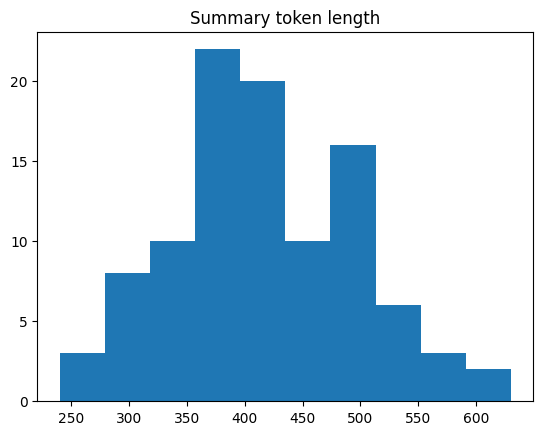

In [16]:
plt.hist(token_lengths(df.lay_summary.to_list()))
plt.title("Summary token length")

### Categories

In [7]:
df.keywords.explode().value_counts()

neuroscience                                   1240
cell biology                                    922
developmental biology                           553
biochemistry and chemical biology               505
structural biology and molecular biophysics     480
microbiology and infectious disease             420
chromosomes and gene expression                 353
computational and systems biology               298
genetics and genomics                           261
evolutionary biology                            253
immunology and inflammation                     243
short report                                    227
cancer biology                                  207
tools and resources                             205
plant biology                                   158
ecology                                         154
stem cells and regenerative medicine            131
epidemiology and global health                  104
medicine                                         96
physics of l

### Token lengths

Article token lengths

In [19]:
tokenizer = LEDTokenizer.from_pretrained("yikuan8/Clinical-Longformer")
gpttokenizer = GPT2Tokenizer.from_pretrained("gpt2")

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'LongformerTokenizer'. 
The class this function is called from is 'LEDTokenizer'.


In [20]:
def token_lengths(texts, tokenizer):
    tokens = tokenizer(texts)
    return list(map(lambda x: len(x), tokens['input_ids']))

In [21]:
art_lens = token_lengths(df.sample(n = 100).article.to_list(), gpttokenizer)

Token indices sequence length is longer than the specified maximum sequence length for this model (1063 > 1024). Running this sequence through the model will result in indexing errors


In [22]:
f"Sample average token length of articles for BioGPT tokenizer: {np.average(art_lens)}"

'Sample average token length of articles for BioGPT tokenizer: 922.36'

(array([ 6.,  9., 16., 21., 16., 17.,  6.,  4.,  4.,  1.]),
 array([ 623. ,  697.4,  771.8,  846.2,  920.6,  995. , 1069.4, 1143.8,
        1218.2, 1292.6, 1367. ]),
 <BarContainer object of 10 artists>)

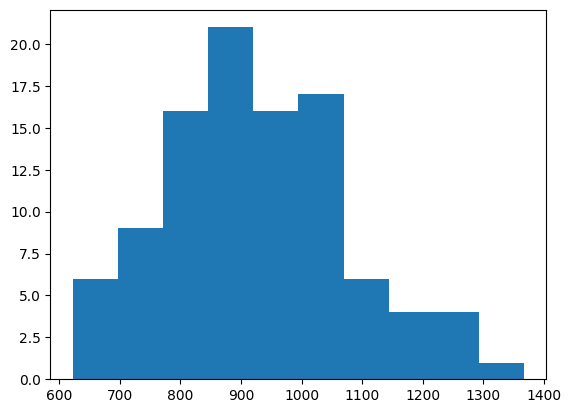

In [17]:
plt.hist(art_lens)

Lay Summary token lengths

(array([ 4.,  4.,  9., 21., 28.,  9., 10., 12.,  1.,  2.]),
 array([245. , 282.3, 319.6, 356.9, 394.2, 431.5, 468.8, 506.1, 543.4,
        580.7, 618. ]),
 <BarContainer object of 10 artists>)

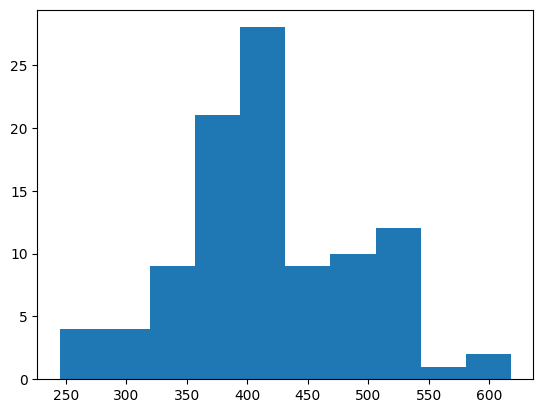

In [16]:
sum_lens = token_lengths(df.sample(n = 100).lay_summary.to_list())
plt.hist(sum_lens)

## With LexRank

In [ ]:
!pip install lexrank

In [33]:
from lexrank import LexRank
from lexrank.mappings.stopwords import STOPWORDS
from path import Path

In [48]:
smp = df.sample(n=1)
smp

,lay_summary,article,headings,keywords,id
2177,"Inside tumors , cancer cells often have to com...",Tumors frequently exhibit aberrant glycosylati...,"[Abstract, Introduction, Results, Discussion, ...",[cancer biology],elife-62644-v1


In [55]:
smp.article.to_list()

['Tumors frequently exhibit aberrant glycosylation , which can impact cancer progression and therapeutic responses . The hexosamine biosynthesis pathway ( HBP ) produces uridine diphosphate N-acetylglucosamine ( UDP-GlcNAc ) , a major substrate for glycosylation in the cell . Prior studies have identified the HBP as a promising therapeutic target in pancreatic ductal adenocarcinoma ( PDA ) . The HBP requires both glucose and glutamine for its initiation . The PDA tumor microenvironment is nutrient poor , however , prompting us to investigate how nutrient limitation impacts hexosamine synthesis . Here , we identify that glutamine limitation in PDA cells suppresses de novo hexosamine synthesis but results in increased free GlcNAc abundance . GlcNAc salvage via N-acetylglucosamine kinase ( NAGK ) is engaged to feed UDP-GlcNAc pools . NAGK expression is elevated in human PDA , and NAGK deletion from PDA cells impairs tumor growth in mice . Together , these data identify an important role f

In [66]:
parts = smp.article.to_list()[0].split("\n")
abstr = parts[0]
txt = ".".join(parts[1:]).split(".")

In [68]:
lxr = LexRank(abstr)

In [69]:
summary = lxr.get_summary(txt, summary_size=10, threshold=.1)

In [70]:
summary

[' Hypoxia , a salient characteristic of the tumor microenvironment ( Lyssiotis and Kimmelman , 2017 ) , was shown to further promote expression of glycolysis and HBP genes in pancreatic cancer cells ( Guillaumond et al ',
 ' To examine the effects of nutrient deprivation on glycosylation , we cultured cells under glucose or glutamine limitation and examined O-GlcNAc levels and cell surface phytohemagglutinin-L ( L-PHA ) binding , a readout of N-acetylglucosaminyltransferase 5 ( MGAT5 ) -mediated cell surface N-glycans ( Figure 1—figure supplement 1A , B ) , which are highly sensitive to UDP-GlcNAc availability ( Lau et al ',
 ' In hematopoietic cells , glucose deprivation limits UDP-GlcNAc levels and dramatically reduces levels of the N-glycoprotein IL3Rα at the plasma membrane in a manner dependent on the HBP ( Wellen et al ',
 ' O-GlcNAcylation was minimally altered by culture in low glutamine and exhibited variable changes in response to glucose limitation ( Figure 1F ) , consisten

In [71]:
scores_cont = lxr.rank_sentences(
    sent,
    threshold=None,
    fast_power_method=False,
)
print(scores_cont)

[0.95749471 0.64379188 0.69239452 1.09636693 1.41247332 1.10987783
 0.83302437 1.1029865  1.         0.91548738 1.23765856 0.69865691
 0.70231647 0.69865691 0.7109768  1.         0.68856881 0.81213635
 1.53488394 0.69865691 0.70231647 0.69865691 0.7109768  0.71552622
 1.         1.60142036 1.31921108 1.         0.12929975 1.45271851
 1.37239481 1.04304831 0.07856792 0.90941409 0.90624582 0.07856792
 0.75552182 1.45857442 1.25913919 1.66856598 1.4445414  1.54333662
 0.68633703 1.         1.1519252  1.         0.18565585 0.90542885
 1.         1.63171898 1.658124   1.         1.52993195 1.30269644
 1.         0.46068855 1.         0.46068855 1.         0.42480772
 0.96759381 1.35745342 1.17351689 1.         0.94287323 1.
 0.46891484 0.91918564 1.         0.35917394 1.3222488  0.70161997
 1.43388303 1.65043874 1.24518621 1.         0.66655853 1.
 1.06061635 1.         0.6818672  1.51109887 1.         1.5593329
 1.         1.23946771 1.         0.88503555 1.         0.81351449
 1.         

(array([ 8.,  5.,  7., 27., 15., 67., 18., 16., 27., 16.]),
 array([0.07856792, 0.23756772, 0.39656753, 0.55556734, 0.71456714,
        0.87356695, 1.03256676, 1.19156656, 1.35056637, 1.50956618,
        1.66856598]),
 <BarContainer object of 10 artists>)

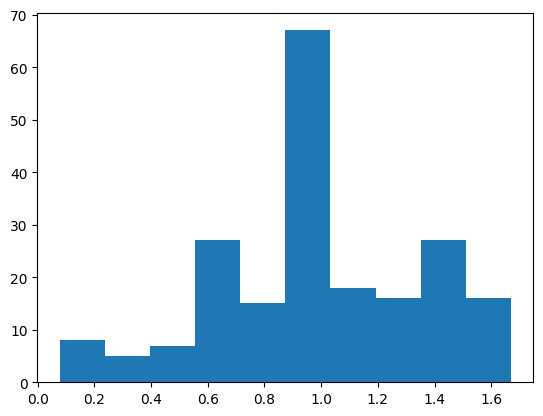

In [72]:
plt.hist(scores_cont)

In [74]:
laysum = smp.lay_summary.to_list()[0].split(".")
laysum

['Inside tumors , cancer cells often have to compete with each other for food and other resources they need to survive ',
 ' This is a key factor driving the growth and progression of cancer ',
 ' One of the resources cells need is a molecule called UDP-GlcNAc , which they use to modify many proteins so they can work properly ',
 ' Because cancer cells grow quickly , they likely need much more UDP-GlcNAc than healthy cells ',
 ' Many tumors , including those derived from pancreatic cancers , have very poor blood supplies , so their cells cannot get the nutrients and other resources they need to grow from the bloodstream ',
 ' This means that tumor cells have to find new ways to use what they already have ',
 ' One example of this is developing alternative ways to obtain UDP-GlcNAc ',
 ' Cells require a nutrient called glutamine to produce UDP-GlcNAc ',
 ' Limiting the supply of glutamine to cells allows researchers to study how cells are producing UDP-GlcNAc in the lab ',
 ' Campbell e

In [78]:
summary = lxr.get_summary(laysum, summary_size=10, threshold=.1)

In [80]:
laysum

['Inside tumors , cancer cells often have to compete with each other for food and other resources they need to survive ',
 ' This is a key factor driving the growth and progression of cancer ',
 ' One of the resources cells need is a molecule called UDP-GlcNAc , which they use to modify many proteins so they can work properly ',
 ' Because cancer cells grow quickly , they likely need much more UDP-GlcNAc than healthy cells ',
 ' Many tumors , including those derived from pancreatic cancers , have very poor blood supplies , so their cells cannot get the nutrients and other resources they need to grow from the bloodstream ',
 ' This means that tumor cells have to find new ways to use what they already have ',
 ' One example of this is developing alternative ways to obtain UDP-GlcNAc ',
 ' Cells require a nutrient called glutamine to produce UDP-GlcNAc ',
 ' Limiting the supply of glutamine to cells allows researchers to study how cells are producing UDP-GlcNAc in the lab ',
 ' Campbell e

In [79]:
summary

['Inside tumors , cancer cells often have to compete with each other for food and other resources they need to survive ',
 ' One of the resources cells need is a molecule called UDP-GlcNAc , which they use to modify many proteins so they can work properly ',
 ' The results showed that the pancreatic cancer cells do not make new UDP-GlcNAc but use a protein called NAGK to salvage GlcNAc ( another precursor of UDP-GlcNAc ) , which may be obtained from cellular proteins ',
 ' Limiting the supply of glutamine to cells allows researchers to study how cells are producing UDP-GlcNAc in the lab ',
 ' used this approach to study how pancreatic cancer cells obtain UDP-GlcNAc when their access to glutamine is limited ',
 ' Many tumors , including those derived from pancreatic cancers , have very poor blood supplies , so their cells cannot get the nutrients and other resources they need to grow from the bloodstream ',
 ' have identified one of the changes that allows pancreatic cancers to survive 

In [76]:
scores_cont = lxr.rank_sentences(
    sent,
    threshold=None,
    fast_power_method=False,
)
print(scores_cont)

[0.95749471 0.64379188 0.69239452 1.09636693 1.41247332 1.10987783
 0.83302437 1.1029865  1.         0.91548738 1.23765856 0.69865691
 0.70231647 0.69865691 0.7109768  1.         0.68856881 0.81213635
 1.53488394 0.69865691 0.70231647 0.69865691 0.7109768  0.71552622
 1.         1.60142036 1.31921108 1.         0.12929975 1.45271851
 1.37239481 1.04304831 0.07856792 0.90941409 0.90624582 0.07856792
 0.75552182 1.45857442 1.25913919 1.66856598 1.4445414  1.54333662
 0.68633703 1.         1.1519252  1.         0.18565585 0.90542885
 1.         1.63171898 1.658124   1.         1.52993195 1.30269644
 1.         0.46068855 1.         0.46068855 1.         0.42480772
 0.96759381 1.35745342 1.17351689 1.         0.94287323 1.
 0.46891484 0.91918564 1.         0.35917394 1.3222488  0.70161997
 1.43388303 1.65043874 1.24518621 1.         0.66655853 1.
 1.06061635 1.         0.6818672  1.51109887 1.         1.5593329
 1.         1.23946771 1.         0.88503555 1.         0.81351449
 1.         

In [81]:
!pip install sumy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.3/97.3 KB 1.8 MB/s eta 0:00:003.6 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 5.8 MB/s eta 0:00:00m eta 0:00:0136m0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached nltk-3.8.1-py3-none-any.whl (1.5 MB)
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 KB 3.4 MB/s eta 0:00:000:00:01
  Using cached lxml-4.9.2-cp38-cp38-macosx_10_15_x86_64.whl (4.7 MB)
Using legacy 'setup.py install' for breadability, since package 'wheel' is not installed.
Using legacy 'setup.py install' for docopt, since package 'wheel' is not installed.
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681832 sha256=f40f66d181735c2d13ab667b6153cca347e6186457d501369d5e90e0988595f9
  Stored in directory: /Users/mw/

In [84]:
import sumy

In [89]:
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lex_rank import LexRankSummarizer
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/mw/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [90]:
parser = PlaintextParser.from_string(smp.article.to_list()[0], Tokenizer("english"))

In [107]:
summarizer = LexRankSummarizer()
#Summarize the document with 2 sentences
summary = summarizer(parser.document, 130)

In [108]:
for sentence in summary:
    print(sentence)

The hexosamine biosynthesis pathway ( HBP ) produces uridine diphosphate N-acetylglucosamine ( UDP-GlcNAc ) , a major substrate for glycosylation in the cell .
The HBP requires both glucose and glutamine for its initiation .
Here , we identify that glutamine limitation in PDA cells suppresses de novo hexosamine synthesis but results in increased free GlcNAc abundance .
GlcNAc salvage via N-acetylglucosamine kinase ( NAGK ) is engaged to feed UDP-GlcNAc pools .
NAGK expression is elevated in human PDA , and NAGK deletion from PDA cells impairs tumor growth in mice .
, 2019; Munkley , 2019 ) .
, 2010; Guo et al .
Hypoxia , a salient characteristic of the tumor microenvironment ( Lyssiotis and Kimmelman , 2017 ) , was shown to further promote expression of glycolysis and HBP genes in pancreatic cancer cells ( Guillaumond et al .
DON has also been reported to sensitize PDA cells to the chemotherapeutic gemcitabine in vitro ( Chen et al .
Thus , the HBP may represent a therapeutic target in

In [109]:
import nltk

In [110]:
len(nltk.word_tokenize(" ".join([str(s) for s in summary])))

3286

In [111]:
token_lengths([" ".join([str(s) for s in summary])])

[3916]